In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train = pd.read_csv('Xtr.csv', header = None)
X_test  = pd.read_csv('Xte.csv')
y_train = pd.read_csv('Ytr.csv')

In [31]:
print type(X_train), X_train.shape, X_test.shape, y_train.shape
X_train = np.array(X_train)

<class 'pandas.core.frame.DataFrame'> (5000, 784) (9999, 784) (5000, 2)


In [207]:
def plot_faces(faces, n_rows=4, n_cols=8, label=False):
    plt.figure(figsize=(14, 10))
    face_shape = (28,28)
    for k, flat_face in enumerate(faces):
        if k >= n_rows * n_cols:
            break
        #print flat_face.shape
        face = flat_face.reshape(face_shape).T
        plt.subplot(n_rows, n_cols, k+1)
        plt.imshow(face, cmap=plt.cm.gray, interpolation='none')
        plt.xticks(())
        plt.yticks(())
        if label:
            plt.title(y_train['Prediction'][k], size=10)
    plt.show()

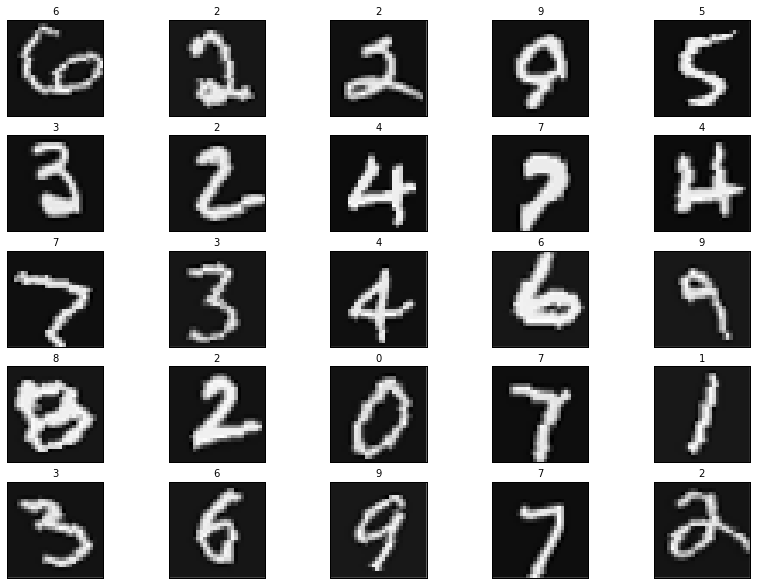

In [208]:
plot_faces(np.array(X_train), 5,5, True)

In [6]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

In [223]:
from skimage.feature import hog
from skimage import exposure #Not needed in implementation

def compute_hog(digits, grid = 3, display = False):
    hog_all = []
    for k, digit in enumerate(np.array(digits)):
        face_shape = (28,28)
        digit.shape
        image = digit.reshape(face_shape).T

        if display:
            fd, hog_image = hog(image, orientations=9, pixels_per_cell=(2,2),
                            cells_per_block=(1,1), visualise=True)
        else:
            fd = hog(image, orientations=4, pixels_per_cell=(2,2),
                            cells_per_block=(1,1), visualise=False)
           
        hog_all.append(fd)
        
        
        if display:
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8), sharex=True, sharey=True)
            
            ax1.axis('off')
            ax1.imshow(image, cmap=plt.cm.gray)
            ax1.set_adjustable('box-forced')
            
            ax2.axis('off')
            ax2.imshow(hog_image, cmap=plt.cm.gray)
            ax2.set_title('Histogram of Oriented Gradients')
            ax2.set_adjustable('box-forced')
            
            # Rescale histogram for better display
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
            ax3.axis('off')
            ax3.imshow(hog_image_rescaled, cmap=plt.cm.gray)
            ax3.set_title('Histogram of Oriented Gradients - Rescale')
            ax3.set_adjustable('box-forced')
            if k >= 0:
                break
            
    return np.array(hog_all)

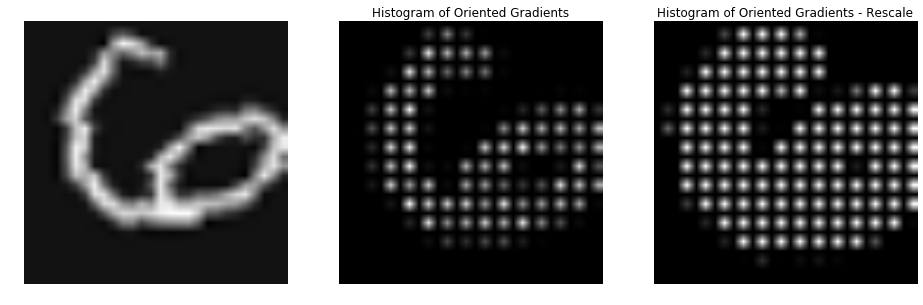

In [224]:
hog_hist = compute_hog(X_train, grid = 14, display = True)

In [211]:
np.shape(hog_hist), np.shape(y_train['Prediction'])

((1L, 6084L), (5000L,))

In [54]:
parameters = {'kernel':['rbf'], 'C':[1,100]}
clf = GridSearchCV(SVC(), parameters, cv = 5)
clf.fit(hog_hist, y_train['Prediction'])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [55]:
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

0.916 (+/-0.020) for {'kernel': 'rbf', 'C': 1}
0.927 (+/-0.017) for {'kernel': 'rbf', 'C': 100}


In [56]:
hog_hist_10 = compute_hog(X_train, grid = 10, display = False)

In [63]:
parameters = {'kernel':['rbf'], 'C':[5,10, 20, 30, 40]}
clf2 = GridSearchCV(SVC(), parameters, cv = 5)
clf2.fit(hog_hist_10, y_train['Prediction'])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [5, 10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [65]:
for params, mean_score, scores in clf2.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

0.934 (+/-0.019) for {'kernel': 'rbf', 'C': 5}
0.935 (+/-0.017) for {'kernel': 'rbf', 'C': 10}
0.932 (+/-0.016) for {'kernel': 'rbf', 'C': 20}
0.929 (+/-0.019) for {'kernel': 'rbf', 'C': 30}
0.928 (+/-0.020) for {'kernel': 'rbf', 'C': 40}


# Try

In [ ]:
hog_hist_10 = compute_hog(X_train, grid = 10, display = False)

In [68]:
parameters = {'kernel':['linear', 'poly', 'sigmoid'], 'C':[1, 10, 100], 'degree' :[2,3,4]}
clf2 = GridSearchCV(SVC(), parameters, cv = 5, n_jobs = 4)
clf2.fit(hog_hist_10, y_train['Prediction'])
for params, mean_score, scores in clf2.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

0.921 (+/-0.016) for {'kernel': 'linear', 'C': 1, 'degree': 2}
0.142 (+/-0.012) for {'kernel': 'poly', 'C': 1, 'degree': 2}
0.111 (+/-0.001) for {'kernel': 'sigmoid', 'C': 1, 'degree': 2}
0.921 (+/-0.016) for {'kernel': 'linear', 'C': 1, 'degree': 3}
0.111 (+/-0.001) for {'kernel': 'poly', 'C': 1, 'degree': 3}
0.111 (+/-0.001) for {'kernel': 'sigmoid', 'C': 1, 'degree': 3}
0.921 (+/-0.016) for {'kernel': 'linear', 'C': 1, 'degree': 4}
0.111 (+/-0.001) for {'kernel': 'poly', 'C': 1, 'degree': 4}
0.111 (+/-0.001) for {'kernel': 'sigmoid', 'C': 1, 'degree': 4}
0.921 (+/-0.016) for {'kernel': 'linear', 'C': 10, 'degree': 2}
0.896 (+/-0.027) for {'kernel': 'poly', 'C': 10, 'degree': 2}
0.111 (+/-0.001) for {'kernel': 'sigmoid', 'C': 10, 'degree': 2}
0.921 (+/-0.016) for {'kernel': 'linear', 'C': 10, 'degree': 3}
0.111 (+/-0.001) for {'kernel': 'poly', 'C': 10, 'degree': 3}
0.111 (+/-0.001) for {'kernel': 'sigmoid', 'C': 10, 'degree': 3}
0.921 (+/-0.016) for {'kernel': 'linear', 'C': 10, 'de

In [80]:
# Orientation = 8
# cells_per_block = (2 ,2)
for k in range(5,13):
    print '_______________________'
    hog_hist = compute_hog(X_train, grid = k, display = False)
    print k
    parameters = {'kernel':['rbf'], 'C':[10]}
    clf = GridSearchCV(SVC(), parameters, cv = 5, n_jobs = 3)
    clf.fit(hog_hist, y_train['Prediction'])
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

_______________________
5
0.915 (+/-0.012) for {'kernel': 'rbf', 'C': 10}
_______________________
6
0.926 (+/-0.010) for {'kernel': 'rbf', 'C': 10}
_______________________
7
0.926 (+/-0.010) for {'kernel': 'rbf', 'C': 10}
_______________________
8
0.932 (+/-0.019) for {'kernel': 'rbf', 'C': 10}
_______________________
9
0.932 (+/-0.019) for {'kernel': 'rbf', 'C': 10}
_______________________
10
0.935 (+/-0.017) for {'kernel': 'rbf', 'C': 10}
_______________________
11
0.935 (+/-0.017) for {'kernel': 'rbf', 'C': 10}
_______________________
12
0.935 (+/-0.017) for {'kernel': 'rbf', 'C': 10}


In [75]:
# Orientation= 4
# cells_per_block = (1 ,1)
for k in range(1,10):
    print '_______________________'
    hog_hist = compute_hog(X_train, grid = k, display = False)
    print k
    parameters = {'kernel':['rbf'], 'C':[10]}
    clf = GridSearchCV(SVC(), parameters, cv = 5, n_jobs = 3)
    clf.fit(hog_hist, y_train['Prediction'])
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

_______________________
1
0.353 (+/-0.026) for {'kernel': 'rbf', 'C': 10}
_______________________
2
0.777 (+/-0.023) for {'kernel': 'rbf', 'C': 10}
_______________________
3
0.857 (+/-0.026) for {'kernel': 'rbf', 'C': 10}
_______________________
4
0.894 (+/-0.012) for {'kernel': 'rbf', 'C': 10}
_______________________
5
0.915 (+/-0.012) for {'kernel': 'rbf', 'C': 10}
_______________________
6
0.926 (+/-0.010) for {'kernel': 'rbf', 'C': 10}
_______________________
7
0.926 (+/-0.010) for {'kernel': 'rbf', 'C': 10}
_______________________
8
0.932 (+/-0.019) for {'kernel': 'rbf', 'C': 10}
_______________________
9
0.932 (+/-0.019) for {'kernel': 'rbf', 'C': 10}


In [76]:
for k in range(10,16):
    print '_______________________'
    hog_hist = compute_hog(X_train, grid = k, display = False)
    print k
    parameters = {'kernel':['rbf'], 'C':[10]}
    clf = GridSearchCV(SVC(), parameters, cv = 5, n_jobs = 3)
    clf.fit(hog_hist, y_train['Prediction'])
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

_______________________
10
0.935 (+/-0.017) for {'kernel': 'rbf', 'C': 10}
_______________________
11
0.935 (+/-0.017) for {'kernel': 'rbf', 'C': 10}
_______________________
12
0.935 (+/-0.017) for {'kernel': 'rbf', 'C': 10}
_______________________
13
0.935 (+/-0.017) for {'kernel': 'rbf', 'C': 10}
_______________________
14
0.935 (+/-0.017) for {'kernel': 'rbf', 'C': 10}
_______________________


KeyboardInterrupt: 

# Own HoG

In [225]:
def own_hog(digit, reshape = False):
    
    # Params initiatialisation
    pix_per_cell = (2,2)
    cells_per_block = (1,1)
    digit_shape = (28,28)
    orientation = 9
    
    ppc_x, ppc_y = pix_per_cell
    cpb_x, cpb_y = cells_per_block
    ds_x, ds_y = digit_shape
    nb_cells_x = int(np.floor(ds_x/ppc_x))
    nb_cells_y = int(np.floor(ds_y/ppc_y))
    
    # Reshaping
    if reshape == True:
        digit = digit.reshape((ds_x, ds_y))
        
    # Calculate row gradient : [-1, 0, 1]
    grad_x = np.zeros((ds_x, ds_y))
    grad_x[:, 1:-1] = digit[:,2:] - digit[:, :-2]
    
    # Calculate column gradient : [-1, 0, 1].T
    grad_y = np.zeros((ds_x, ds_y))
    grad_y[1:-1, :] = digit[2:, :] - digit[:-2, :]
    
    # Calculate histogram
    histogram = comp_hog(grad_x, grad_y, ppc_x, ppc_y, ds_x, ds_y, nb_cells_x, nb_cells_y, orientation)
    
    # Normalisation
    norm_histogram = compute_normalisation(histogram, cpb_x, cpb_y, nb_cells_x, nb_cells_y, orientation)
    
    # Vetorisation
    norm_histogram = norm_histogram.ravel()
    
    return norm_histogram

In [233]:
def comp_hog(grad_x, grad_y, ppc_x, ppc_y, ds_x, ds_y, nb_cells_x, nb_cells_y, nb_or):
    
    # Calculate magnitude & orientation
    magnitude = np.hypot(grad_y, grad_x)
    orientation = np.arctan2(grad_x, grad_y) * (180 / np.pi) % 180
    
    # Initialisation 
        # Center (x_0, y_0) of the cell
    x_0 = float(ppc_x)/2
    y_0 = float(ppc_y)/2
    trunc_dsx = nb_cells_x * ppc_x
    trunc_dsy = nb_cells_y * ppc_y
        # Orientation
    nb_orientation = 180. / nb_or
        # Cells
    end_row = ppc_x
    start_row = -end_row
    end_column = ppc_y
    start_column = -end_column
        # Histogram
    hist = np.zeros((nb_cells_y, nb_cells_x, nb_or))    
        
    for i in range(nb_or):
        # init orientation
        start_or = nb_orientation*(i+1)
        end_or = nb_orientation*i
        
        # init column
        y = y_0
        y_i = 0
        
        while y < trunc_dsx:
            # init row
            x = x_0
            x_i = 0
            
            while x < trunc_dsy:
                hist[y_i, x_i, i] = compute_cell_hog(x, y, ppc_x, ppc_y, ds_x, ds_y, start_or, end_or, start_row, end_row, start_column, end_column, magnitude, orientation)
                # row incrementation
                x_i += 1
                x += ppc_x
                      
            # column incrementation    
            y_i += 1
            y += ppc_y
            
            
    return hist

In [234]:
def compute_cell_hog(x, y, ppc_x, ppc_y, ds_x, ds_y, start_or, end_or, start_row, end_row, start_column, end_column, magnitude, orientation):
    total = 0
    for row in range(start_row, end_row):
        if x+row<0 or x+row >= ds_x:
            continue

        for column in range(start_column, end_column):
            if y+column <0 or y+column >= ds_y:
                continue
            if orientation[x+row, y+column] >= start_or or orientation[x+row, y+column]< end_or:
                continue
            
            total += magnitude[x+row, y+column]

    return float(total) / (ppc_x*ppc_y)

In [235]:
def compute_normalisation(histogram, cpb_x, cpb_y, nb_cells_x, nb_cells_y, orientation):
    block_x = nb_cells_x + 1 - cpb_x
    block_y = nb_cells_y + 1 - cpb_y
    norm_histogram = np.zeros((block_y, block_x, cpb_y, cpb_x, orientation ))
    for i in range(block_x):
        for j in range(block_y):
            block = histogram[j:j+cpb_y , i:i+cpb_x, :]
            epsilon = 1.0E-5
            norm_histogram[j, i, :] = block / np.sqrt(block.sum()**2 + epsilon)
    
    return norm_histogram

In [237]:
HOG = []
for k, digit in enumerate(X_train):
    if k%500 == 0:
        print k
    HOG.append(own_hog(digit, reshape = True))

0
500
1000
1500
2000
2500
3000
3500
4000
4500


C:\Users\Igor\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Igor\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [241]:
parameters = {'kernel':['rbf'], 'C':[1, 10, 30, 50]}
clf = GridSearchCV(SVC(), parameters, cv = 5, n_jobs = 4)
clf.fit(HOG, y_train['Prediction'])
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

0.895 (+/-0.010) for {'kernel': 'rbf', 'C': 1}
0.938 (+/-0.008) for {'kernel': 'rbf', 'C': 10}
0.941 (+/-0.013) for {'kernel': 'rbf', 'C': 30}
0.942 (+/-0.014) for {'kernel': 'rbf', 'C': 50}


In [242]:
parameters = {'kernel':['rbf'], 'C':[60,70,80,90]}
clf = GridSearchCV(SVC(), parameters, cv = 5, n_jobs = 3)
clf.fit(HOG, y_train['Prediction'])
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

0.943 (+/-0.014) for {'kernel': 'rbf', 'C': 60}
0.941 (+/-0.014) for {'kernel': 'rbf', 'C': 70}
0.941 (+/-0.014) for {'kernel': 'rbf', 'C': 80}
0.941 (+/-0.014) for {'kernel': 'rbf', 'C': 90}


In [244]:
from sklearn.cross_validation import train_test_split

train_train, train_test, y_train_train, y_train_test = train_test_split(HOG, y_train, test_size = 0.2)